In [2]:
import seaborn as sb

titanic = sb.load_dataset("titanic")
titanic.info() #데이터 정보보기



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
#빈값 채우기(결측치 채우기)
#titanic.age.describe() #나이에 대한 모든 정보보기
titanic.age.median() #중간값

28.0

In [4]:
#나이 빈값 채우기
titanic.age =titanic.age.fillna(titanic.age.median())


In [5]:
#각 열의 빈값 개수확인
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
#embarked최빈값채우기
titanic.embarked.describe()
titanic.embarked = titanic.embarked.fillna('S')

In [7]:
#deck 최빈값 채우기
titanic.deck.describe()
titanic.deck = titanic.deck.fillna('C')

In [8]:
#embark_town 최빈값 채우기
titanic.embark_town.describe()
#titanic.embark_town.mode()
titanic.embark_town = titanic.embark_town.fillna('Southampton')

In [9]:
titanic.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [10]:
#survived 0 - 사망 1 - 생존으로 치환
titanic.survived.replace(0,'사망')
titanic.survived.replace(1,'생존')


0       0
1      생존
2      생존
3      생존
4       0
       ..
886     0
887    생존
888     0
889    생존
890     0
Name: survived, Length: 891, dtype: object

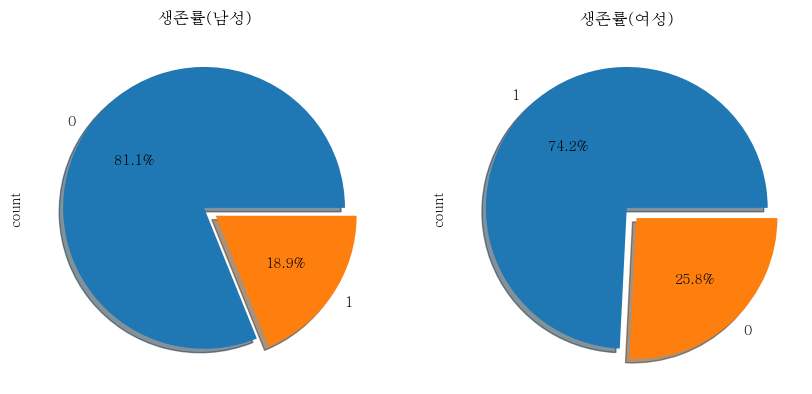

In [11]:
#데이터 탐색
#시각화를 위해
import matplotlib.pyplot as plt
#한글 처리를 위해
import matplotlib
matplotlib.rcParams['font.family']='batang'
'''
fig1 = plt.figure() #전체 그래프
fig1_sub1 = fig1.add_subplot(1,2,1) #1행 2열의 첫번째 내부 그래프
fig1_sub1.set_title('생존률(남성)')
#titanic['survived'][titanic['sex'] == 'male'] #밑줄이랑 같은의미
sub1_data = titanic.loc[titanic.sex=='male','survived']
                                  #다른조각 띄우기   퍼센트표시포맷설정   그림자여부
sub1_data.value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%',shadow = True)
fig1_sub2 = fig1.add_subplot(1,2,2)
fig1_sub2.set_title('생존률(여성)')
sub2_data = titanic['survived'][titanic['sex'] == 'female']
sub2_data.value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%',shadow = True)
plt.show()
'''
#f-전체그래프 ax - 서브그래프
f, ax = plt.subplots(1,2,figsize = (10,5))
titanic.loc[titanic.sex=='male','survived'].value_counts().plot.pie(explode = [0,0.1],ax = ax[0], autopct = '%1.1f%%',shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1],ax = ax[1], autopct = '%1.1f%%',shadow = True)
ax[0].set_title('생존률(남성)')
ax[1].set_title('생존률(여성)')
plt.show()

<Axes: xlabel='pclass'>

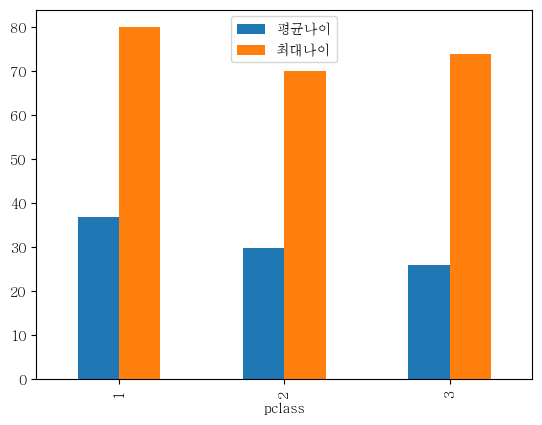

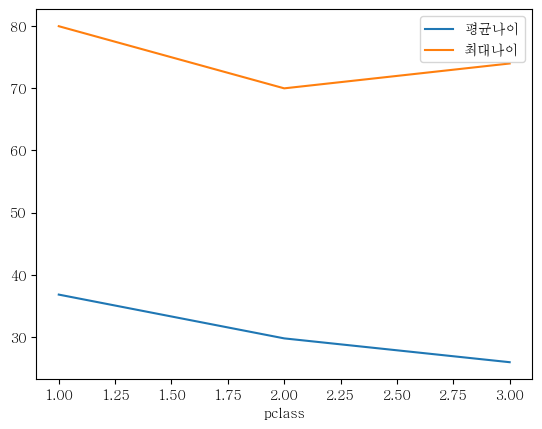

In [12]:
#pclass별 평균나이 데이터 그래프
import pandas as pd
s1=titanic.groupby('pclass').age.mean()
s2=titanic.groupby('pclass').age.max()
df1=pd.DataFrame({'평균나이':s1,'최대나이':s2})
df1.plot.bar()
df1.plot()

<Axes: >

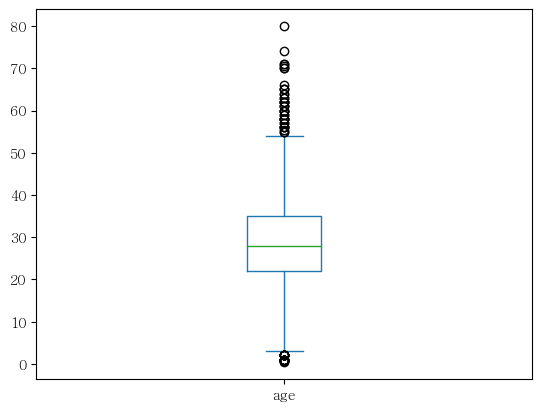

In [14]:
#나이만 뽑아서 boxplot 그리기

titanic[['age']].plot.box()

<Axes: xlabel='pclass'>

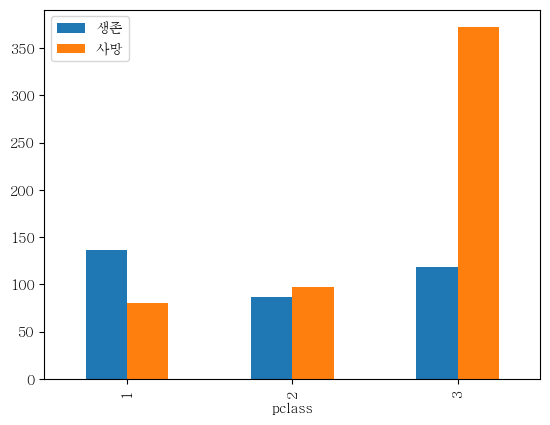

In [15]:
#객실 등급에 따른 생존수,사망수를 bar 그래프로 표현하자! p226 우리는 데이터프레임
titanic.groupby('pclass').survived.count() 
#위에 실수  count()는 NaN 빼고 세는것 즉, 이렇게 수정해야함
sub1=titanic.loc[titanic.survived==1,['pclass','survived']] 
s1=sub1.groupby('pclass').survived.count() #산사람

#또는  (이건 안배운거) - 다중인덱스
sub2=titanic.groupby('pclass').survived.value_counts()
s2=sub2[:,0] #죽은사람


#최종 데이터 프레임 만들기
df=pd.DataFrame({'생존':s1,'사망':s2})
df.plot.bar()

<Axes: xlabel='pclass'>

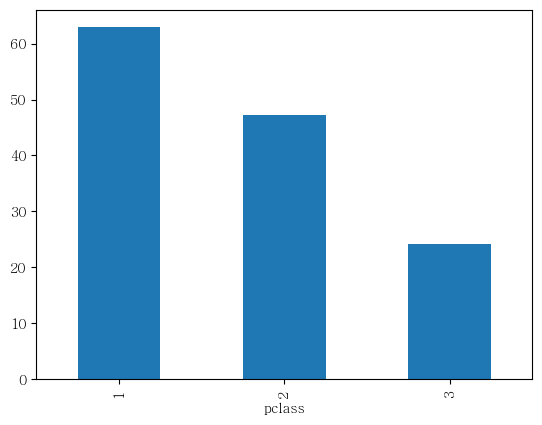

In [16]:
#객실등급별 생존률로 다시 그려보기(bar)
((s1*100)/(s1+s2)).plot.bar()

In [17]:
#분석용 데이터 변경 
#성별이 문자임으로 male는 1로 female 0으로 변환
titanic.sex=titanic.sex.replace('male',1).replace('female',0)
#titanic.sex=titanic.sex.map({'male':1,'female':0}) #위에 문장과 동일의미
#가족(family)수 본인포함 컬럼추가
titanic['family']=titanic['sibsp']+titanic['parch']+1
df=titanic[['survived','pclass','sex','age','fare','family']]
df


,survived,pclass,sex,age,fare,family
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,2
2,1,3,0,26.0,7.9250,1
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,1
887,1,1,0,19.0,30.0000,1
888,0,3,0,28.0,23.4500,4
889,1,1,1,26.0,30.0000,1


In [18]:
#상관분석 p227 (주의> 당연히 숫자형 데이터만 넣어줘야 한다.)
titanic_corr=df.corr(method='pearson')
titanic_corr

,survived,pclass,sex,age,fare,family
survived,1.000000,-0.338481,-0.543351,-0.064910,0.257307,0.016639
pclass,-0.338481,1.000000,0.131900,-0.339898,-0.549500,0.065997
sex,-0.543351,0.131900,1.000000,0.081163,-0.182333,-0.200988
age,-0.064910,-0.339898,0.081163,1.000000,0.096688,-0.245619
fare,0.257307,-0.549500,-0.182333,0.096688,1.000000,0.217138
family,0.016639,0.065997,-0.200988,-0.245619,0.217138,1.000000


C:\Users\DongGyu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


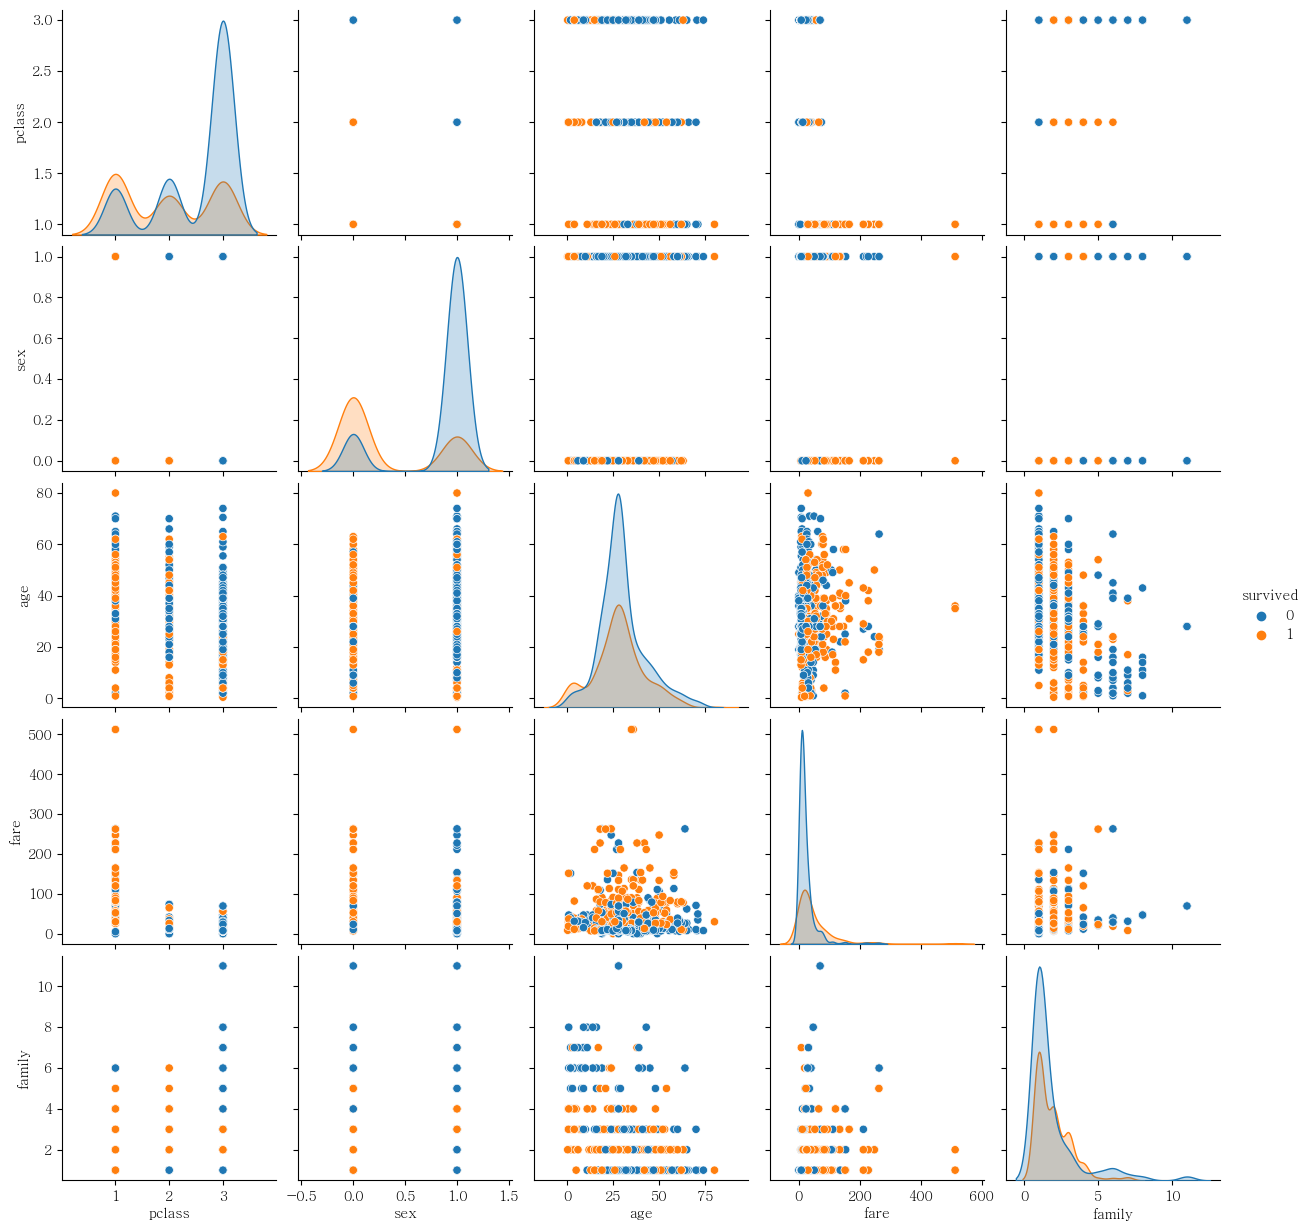

In [20]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
#산점도 시각화 p229
sb.pairplot(df,hue='survived')
plt.show()

C:\Users\DongGyu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


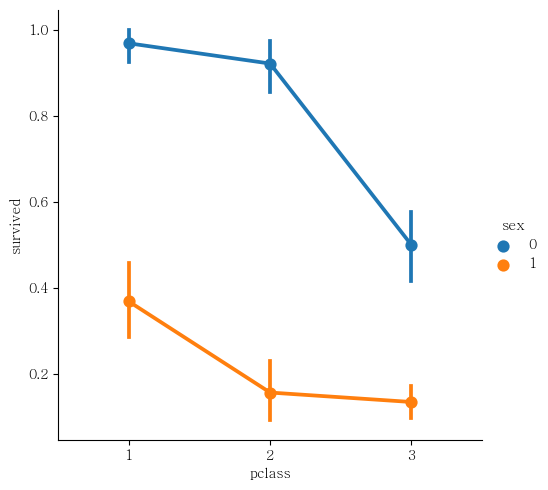

In [21]:
#pclass와 생존의 상관관계 시각화 에러바로 표시하기 p230
sb.catplot(x='pclass',y='survived',data=df,hue='sex',kind='point')

plt.show()

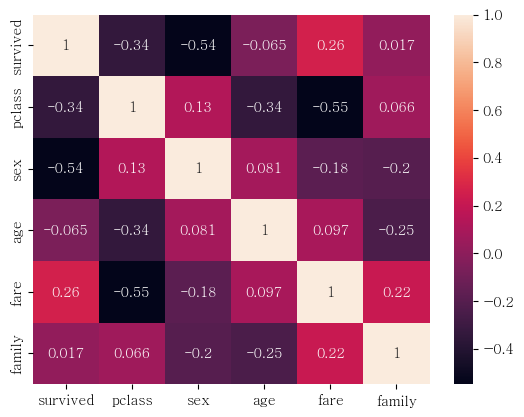

In [22]:
#상관 관계 히트맵으로 그리기 p231
sb.heatmap(titanic_corr,annot=True)
plt.show()

<Axes: >

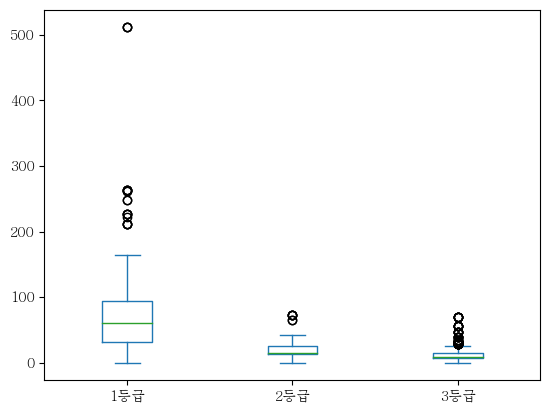

In [41]:
#등급별 요금
df1 = titanic[['pclass','fare']]
s1 = df1.query('pclass == 1')['fare']
s2 = df1.query('pclass == 2')['fare']
s3 = df1.query('pclass == 3')['fare']
pd.DataFrame({'1등급':s1,'2등급':s2,'3등급':s3}).plot.box()

In [45]:
titanic.query('fare == 0')['pclass']


179    3
263    1
271    3
277    2
302    3
413    2
466    2
481    2
597    3
633    1
674    2
732    2
806    1
815    1
822    1
Name: pclass, dtype: int64